高中体测数据可视化（体测分数_男生，体测分数-女生）

1、对男1000米跑、男引体进行等宽分箱操作，分成3份，并使用饼图绘制百分比

2、对女800米跑、女跳远进行直方图绘制统计各分数段人数，分成4份

3、使用嵌套饼图对比男女生体重指数进行比例统计，分为正常、低体重、超重、肥胖(男女生体重指数参考如下)

In [27]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import matplotlib

matplotlib.rcParams['font.sans-serif']='Microsoft YaHei'

In [236]:
m_df = pd.read_excel('./体测分数_男生.xls')
f_df = pd.read_excel('./体测分数_女生.xls')

### 男1000米跑

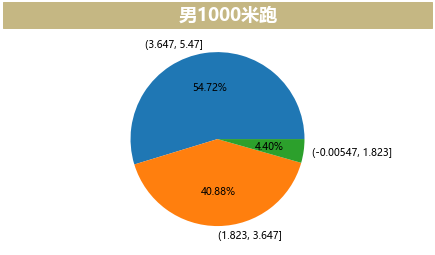

In [252]:
# 男1000米跑 等宽分箱 分成3份 并绘制饼图
m_run_lev=pd.cut(m_df['男1000米跑'],bins=3)
m_run_lev = m_run_lev.value_counts(normalize=True)

_=plt.pie(x=m_run_lev, labels=m_run_lev.index,autopct='%0.2f%%')
_=plt.title(label='                                男1000米跑                            ',
         fontsize=18, weight='bold', color='white', backgroundcolor='#c5b783',pad=10)

### 男引体

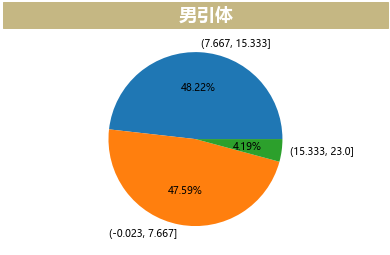

In [251]:
# 男引体 等宽分箱 分成3份 并绘制饼图
m_up_lev=pd.cut(m_df['男引体'],bins=3)
m_up_lev = m_up_lev.value_counts(normalize=True)

_=plt.pie(x=m_up_lev, labels=m_up_lev.index,autopct='%0.2f%%')

_=plt.title(label='                                男引体                            ',
         fontsize=18, weight='bold', color='white', backgroundcolor='#c5b783', pad=10)

### 女800米跑
女800米跑 直方图绘制统计各分数段人数，分成4份


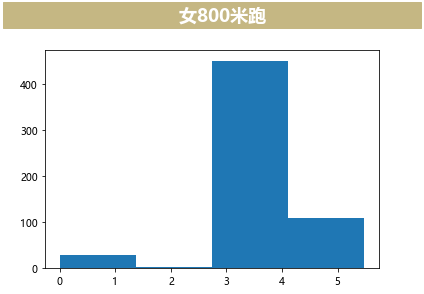

In [250]:
# 去掉异常值
cond = f_df['女800米跑']<=10

_ = plt.hist(f_df['女800米跑'][cond], bins=4,density=False)
_ = plt.title(label='                                女800米跑                            ',
         fontsize=18, weight='bold', color='white', backgroundcolor='#c5b783',pad=30)


### 女跳远
女跳远进行直方图绘制统计各分数段人数，分成4份

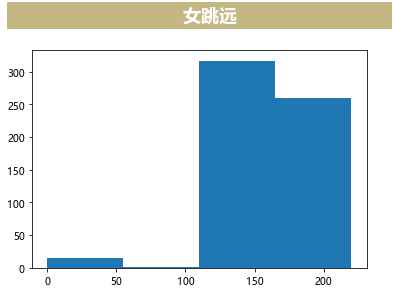

In [146]:

_ = plt.hist(f_df['女跳远'], bins=4,density=False)
_ = plt.title(label='                                女跳远                            ',
         fontsize=18, weight='bold', color='white', backgroundcolor='#c5b783',pad=30)

### 男女生体重指数比例统计
使用嵌套饼图对比男女生体重指数进行比例统计，分为正常、低体重、超重、肥胖(男女生体重指数参考如下)

In [254]:
# 男生体重指数 级别
def f_weight_lev(x):
    if x >= 26.4 :
        lev = '肥胖'
    elif x>= 23.3:
        lev = '超重'
    elif x >= 16.5:
        lev = '正常'
    else :
        lev = '超低重'
    return lev

# 女生体重指数 级别
def m_weight_lev(x):
    if x >= 25.3 :
        lev = '肥胖'
    elif x>= 22.8:
        lev = '超重'
    elif x >= 16.5:
        lev = '正常'
    else :
        lev = '超低重'
    return lev

m_bmi_lev = m_df['BMI'].map(f_weight_lev).value_counts()
f_bmi_lev = f_df['BMI'].map(m_weight_lev).value_counts()


cs = ['#4682B4', '#DC143C', '#228B22', '#FF8C00']
plt.figure(figsize=(9,9))

_ = plt.pie(m_bmi_lev, radius=1, labels=m_bmi_lev.index, #autopct='%0.2f%%',
        colors=cs,
        wedgeprops={'linewidth':3, # 间隔的宽度
                   'width':0.3, # 饼图的宽度
                   'edgecolor':'white'}, #间隔的颜色
        textprops={'family':'Microsoft YaHei', 'fontsize':18})

_ = plt.pie(f_bmi_lev, radius=0.7, #labels=m_bmi_lev.index, 
       # autopct='%0.2f%%',
       colors=cs,
        wedgeprops={'linewidth':3, # 间隔的宽度
                   'width':0.3, # 饼图的宽度
                   'edgecolor':'white'}, #间隔的颜色
        textprops={'family':'Microsoft YaHei', 'fontsize':18})

_ = plt.title(label='                                男女生体重指数占比                            ',
         fontsize=18, weight='bold', color='white', backgroundcolor='#c5b783',pad=30)

_ = plt.legend(m_bmi_lev.index, prop='Microsoft YaHei')